## Praca domowa 4

#### Autor: Michał Tomczyk

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [73]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

##### Podpunkt a

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
df[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


##### Podpunkt b

In [51]:
df1 = df[df.Year == 2010]
max_sold_genre = df1.groupby('Genre', as_index = False)['Global_Sales'].sum() 
#Nie jestem pewien, czy "Zarobił" = "Sprzedał najwięcej egzemplarzy"
max_sold_genre = max_sold_genre.sort_values('Global_Sales',ascending = False, ignore_index = True)
max_sold_genre.head(1)

,Genre,Global_Sales
0,Action,117.64


##### Podpunkt c

In [75]:
df2_eu = df.groupby('Genre', as_index = False).agg({'EU_Sales' : 'mean'})
df2_jp = df.groupby('Genre', as_index = False).agg({'JP_Sales' : 'mean'})
df2 = df2_eu.merge(df2_jp)
df3 = df2[df2.EU_Sales < df2.JP_Sales]
df3 = df3[["Genre", "JP_Sales"]]
df3.columns = ["Typ Gry", "Średnia sprzedaż w Japonii"]
df3.sort_values(by = "Średnia sprzedaż w Japonii")

,Typ Gry,Średnia sprzedaż w Japonii
11,Strategy,0.073284
5,Puzzle,0.099439
7,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

##### Oryginalny wykres:

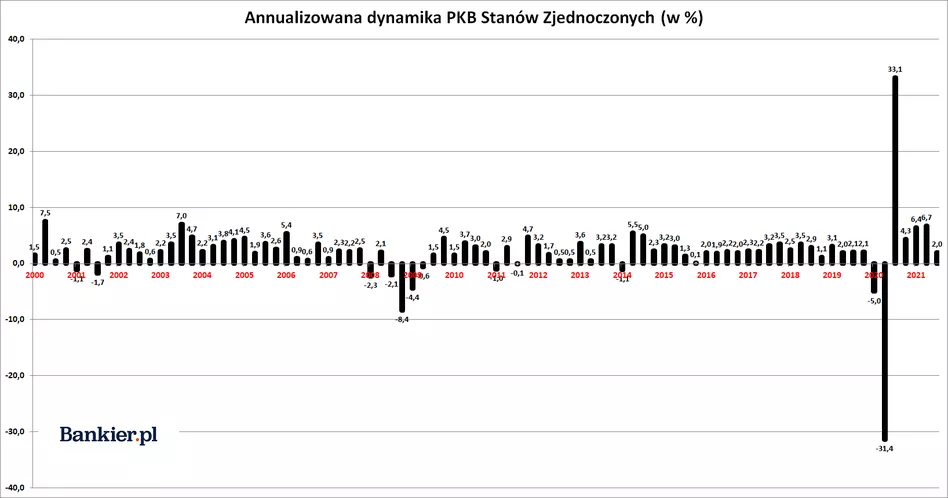

Źródło: https://www.bankier.pl/wiadomosc/PKB-USA-w-III-kwartale-2021-8213977.html

##### Wykres poprawiony w Ggplot 2: 

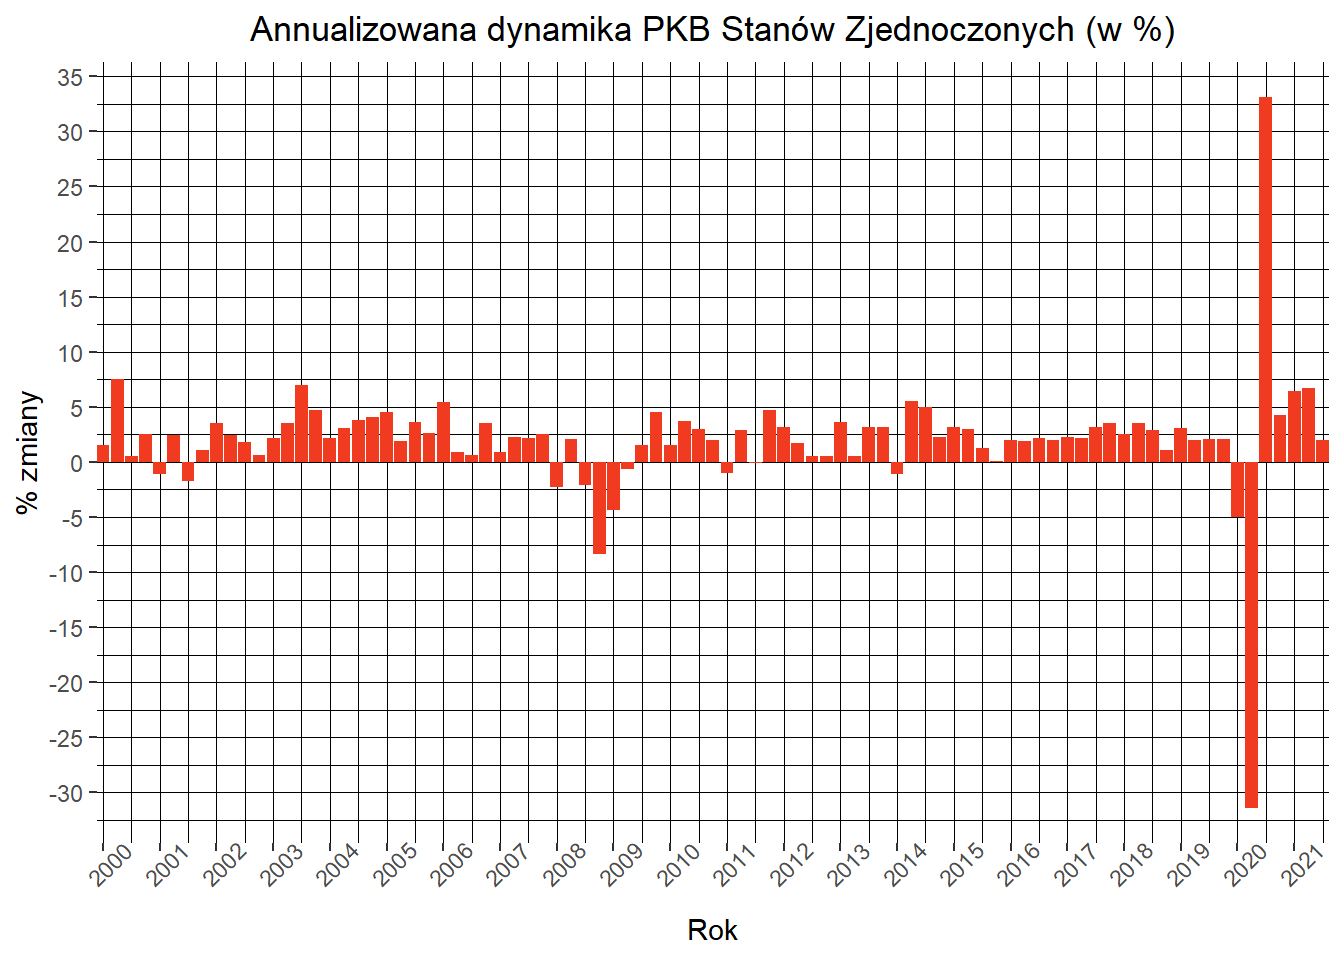

##### Wykres poprawiony w Pythonie:

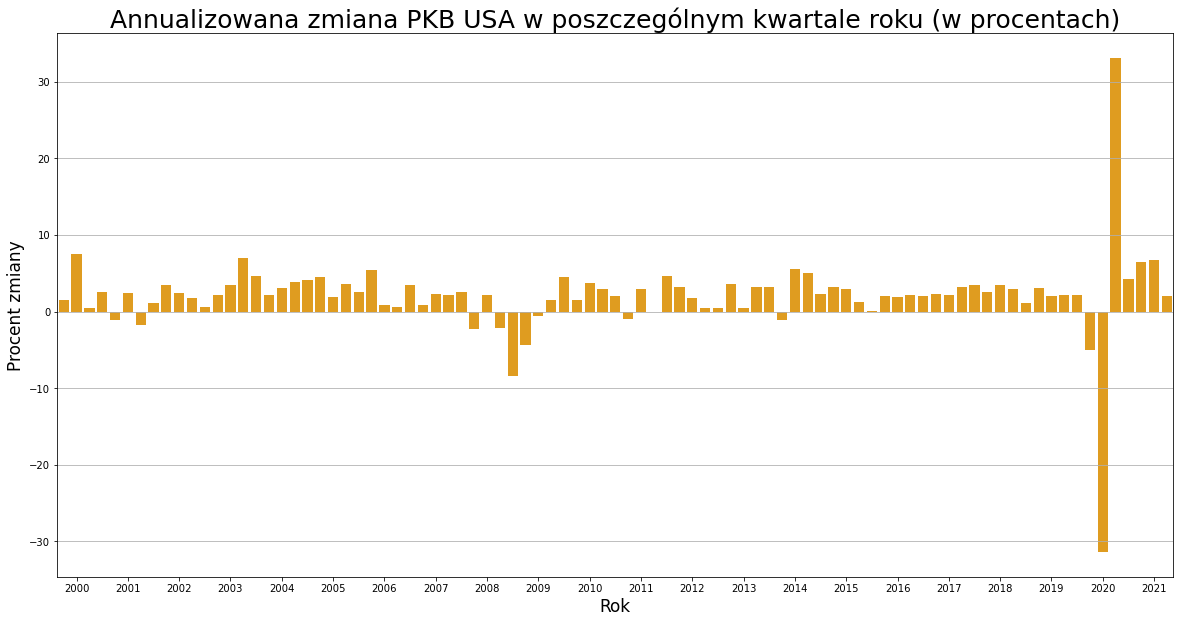

##### Dlaczego ten wykres jest lepszy od poprzedniego?

Przede wszystkim jest bardziej estetyczny. Zmiejszyłem ilość siatek poziomych i usunąłem wszystkie pionowe. Nie przeszkodziło to w poprawnym odczytywaniu danych z wykresu, a poprawiło jakość wizualną wizualizacji.